In [6]:
# import OE tools and data
#import oenotebook as oenb
from openeye.oechem import *
from openeye.oegraphsim import *

In [7]:
import matplotlib.pyplot as plt
import numpy as np
#import mpld3
%matplotlib inline
import seaborn as sns
sns.set_context("talk")
colors = sns.color_palette()
# sns.palplot(colors)
do_tooltips = False

descriptor_dict = {
    "Circular":OEFPType_Circular,
    "Lingo":OEFPType_Lingo,
    "MACSS":OEFPType_MACCS166,
    "Path":OEFPType_Path,
    "Tree":OEFPType_Tree,
}

fpList = []
ifs = oemolistream()
ifs.open("/Users/jfeng1/Datasets/CovalentInhibitor/all_selected.sdf")
mol = OEGraphMol()
molList = []
while OEReadMolecule(ifs,mol):
    fp_array = []
    fingerprint = OEFingerPrint()
    OEMakeFP(fingerprint,mol,descriptor_dict["Circular"])
    for i in range(0,fingerprint.GetSize()):
        if fingerprint.IsBitOn(i):
            fp_array.append(1)
        else:
            fp_array.append(0)
    fpList.append(fp_array)
    molList.append(OEGraphMol(mol))
ifs.close()


In [8]:
# from sklearn.manifold import TSNE
# two_tsne = TSNE(metric="jaccard")
print len(fpList)
# Y = two_tsne.fit_transform(np.array(fpList))
from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np
tsne = TSNE(n_jobs=8,metric="jaccard")
Y = tsne.fit_transform(np.array(fpList))
# f = plt.figure()
# sc = plt.scatter(Y[:,0], Y[:, 1], s=100, alpha=0.5,label="Cox2")
# plt.show()

ofs = oemolostream()
ofs.open("/Users/jfeng1/Datasets/CovalentInhibitor/tsne.sdf")
for id,mol in enumerate(molList):
    OESetSDData(mol,"X","%f"%Y[id,0])
    OESetSDData(mol,"Y","%f"%Y[id,1])
    OEWriteMolecule(ofs,mol)
ofs.close()




4666


## Spectral Embedding

Spectral embedding finds a low-dimensional representation through spectral decomposition on the laplacian of the affinity graph.

In [20]:
from sklearn.manifold import SpectralEmbedding

In [21]:
se = SpectralEmbedding(affinity="precomputed")
Y = se.fit_transform(1.0 - two_dists.DistArray)

rand_se = SpectralEmbedding(affinity="precomputed")
D = rand_se.fit_transform(1.0 - rand_dists.DistArray)

NameError: name 'two_dists' is not defined

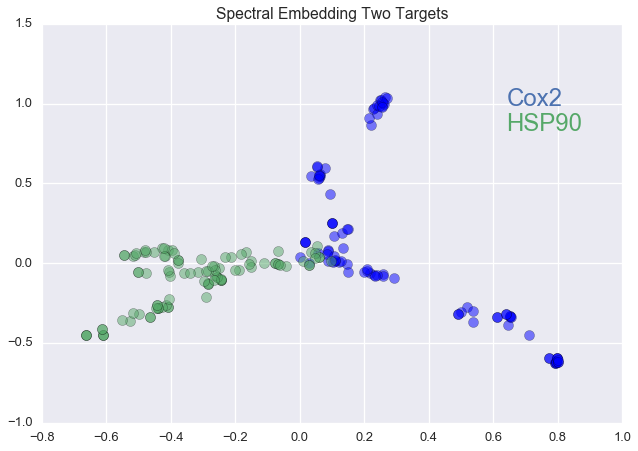

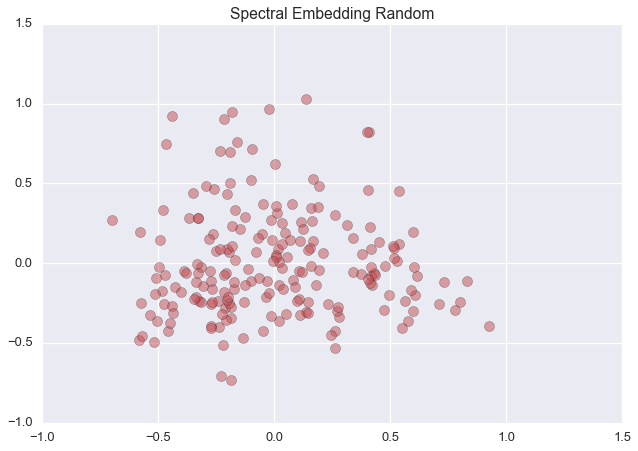

In [20]:
f = plt.figure()
sc = plt.scatter(Y[cox_df.index, 0], Y[cox_df.index, 1], s=100, alpha=0.5,label="Cox2")
sc2 = plt.scatter(Y[hsp_df.index, 0], Y[hsp_df.index, 1], c=colors[1], s=100, alpha=0.5,label="HSP90")
plt.text(0.8*max(Y[:,0]),0.95*max(Y[:,1]),"Cox2",color=colors[0],size=24)
plt.text(0.8*max(Y[:,0]),0.8*max(Y[:,1]),"HSP90",color=colors[1],size=24)

plt.title("Spectral Embedding Two Targets")

if do_tooltips:
    oenb.add_molecule_tooltips(cox_df, sc, f, show=False, img_col="img")
    oenb.add_molecule_tooltips(hsp_df, sc2, f, img_col="img")
    f.clear()

f = plt.figure()
sc = plt.scatter(D[:,0], D[:,1], s=100, alpha=0.5, c=colors[2])
plt.title("Spectral Embedding Random")
if do_tooltips:
    oenb.add_molecule_tooltips(df_random, sc, f, img_col="img")
    f.clear()